# Maximum Likelihood Estimation (MACS 30100)
### Tyler Amos

##### 22 January 2018

In [396]:
import numpy as np
import scipy.stats as sts
import pandas as pd
pts = np.loadtxt('incomes.txt')
import matplotlib.pyplot as plt
%matplotlib inline

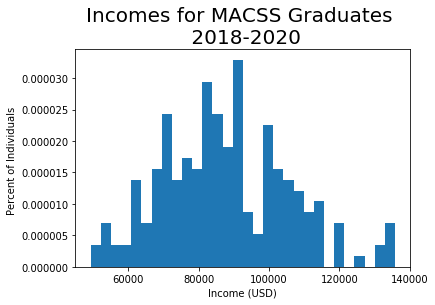

In [397]:
plt.hist(pts, 30, normed = True)
plt.title('Incomes for MACSS Graduates \n 2018-2020', fontsize=20)
plt.xlabel('Income (USD)')
plt.ylabel('Percent of Individuals ')
plt.show()

# b)

Plot:


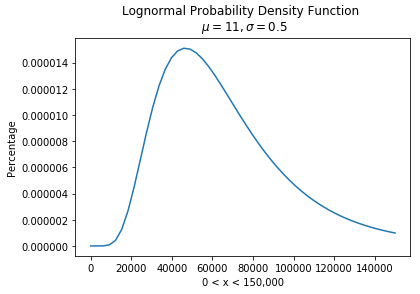

Log-likelihood: -2385.86


In [398]:
# Define function that generates values of a lognormal
# probability density function (PDF)
def lognorm_pdf(xvals, mu, sigma, cutoff):
    if cutoff == 'None':
        prob_notcut = 1.0 - sts.norm.cdf(0, loc=mu, scale=sigma)
    else:
        prob_notcut = (sts.norm.cdf(cutoff, loc=mu, scale=sigma) -
                       sts.norm.cdf(0, loc=mu, scale=sigma))
            
    pdf_vals    = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals
print("Plot:")

cutoff = 150000
zero_150k_range = np.linspace(0.001,cutoff)
b_pdf = lognorm_pdf(zero_150k_range, 11, 0.5, cutoff)
plt.plot(zero_150k_range, lognorm_pdf(zero_150k_range, 11, 0.5, cutoff))
plt.ylabel("Percentage")
plt.xlabel("0 < x < 150,000")
plt.title('Lognormal Probability Density Function \n $\mu = 11, \sigma = 0.5$')
plt.show()

# Define log likelihood function for the normal distribution
def log_lik(xvals, mu, sigma, cutoff):
    pdf_vals = lognorm_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()   
    return log_lik_val

print('Log-likelihood: {0:.2f}'.format( log_lik(pts, 11, 0.5, cutoff)))

The log-likelihood value is $\approx$ -2385.86.

# c.)

Estimated Parameters are: 
 mu_MLE= 11.359024396734544  sig_MLE= 0.20817853015560012
Log likelihood value is: 2241.72


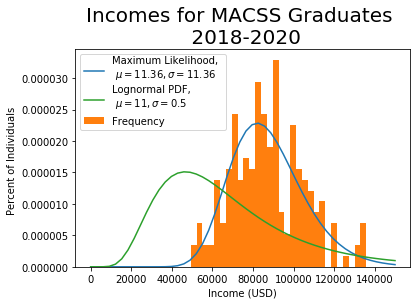

In [399]:
# From R. Evans lecture notes. 

def crit(params, *args):
    mu, sigma = params
    xvals, cutoff = args
    return  - log_lik(xvals, mu, sigma, cutoff)

import scipy.optimize as opt
mu_init = 11  
sig_init = 0.5  
params_init = np.array([mu_init, sig_init])
mle_args = (pts, cutoff)

results = opt.minimize(crit, params_init, args=(mle_args),  bounds=((0.1, None), (0.1, None)))
mu_MLE, sig_MLE = results.x
print('Estimated Parameters are: \n mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print('Log likelihood value is: {0:.2f}'.format(results.fun))

# plotting pdfs
# formatting reference: https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points
plt.plot(zero_150k_range, max_lik_pdf, label = 'Maximum Likelihood, \n $\mu = {0:.2f}, \sigma = {0:.2f}$'.format(mu_MLE, sig_MLE))
plt.hist(pts, 30, normed = True, label = 'Frequency')
plt.title('Incomes for MACSS Graduates \n 2018-2020', fontsize=20)
plt.xlabel('Income (USD)')
plt.ylabel('Percent of Individuals ')
plt.plot(zero_150k_range, b_pdf, label = 'Lognormal PDF, \n $\mu = 11, \sigma = 0.5$')
plt.legend()
plt.show()

In [400]:
# From R. Evans notes
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('Variance Covariance Matrix (MLE) = \n', vcv_mle)
print('Standard error for mu estimate = ', np.around(stderr_mu_mle,4))
print('Standard error for sigma estimate = ', np.around(stderr_sig_mle,4))

Variance Covariance Matrix (MLE) = 
 [[ 0.00022521 -0.00022521]
 [-0.00010284  0.00010284]]
Standard error for mu estimate =  0.015
Standard error for sigma estimate =  0.0101


# d.)


In [401]:
# From R. Evans lecture notes. 
log_lik_h0 = log_lik(pts, 11, 0.5, cutoff)
log_lik_mle = log_lik(pts, mu_MLE, sig_MLE, cutoff)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('Chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

Chi squared of H0 with 2 degrees of freedom p-value =  0.0


This result indicates the null hypothesis $H_0$ is unlikely. We can therefore reject it in favor of $H_1$. In other words, we can say that the income data came from the distribution in part (b).

# e.)

In [402]:
e = lognorm_pdf(pts, mu_MLE, sig_MLE, cutoff)
lognorm_cdf = lambda x: sts.lognorm.cdf(x, s = sig_MLE, scale = np.exp(mu_MLE))
print("The probability of earning more than $100,000 is {0:.2f}. ".format(1 - lognorm_cdf(100000)))
print("The probability of earning less than $75,000 is {0:.2f}. ".format(lognorm_cdf(75000)))


The probability of earning more than $100,000 is 0.23. 
The probability of earning less than $75,000 is 0.26. 


# 2. a)

In [403]:
pts = pd.read_csv('sick.txt')
# Define log likelihood function
def log_lik(params, *args):
    # Ref: http://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf
    b_0, b_1, b_2, b_3, sigma = params
    sick, age, children, temp = args
    error = sum((sick - b_0 + b_1*age + b_2*children + b_3*temp)**2)
    return (-200/2)*np.log(2*np.pi) - (200*np.log(sigma)) - (1/(2*sigma**2)) * error

def crit(params, *args):
    return  - log_lik(params, *args)

sick = pts.sick
age = pts.age
children = pts.children
temp = pts.avgtemp_winter
params_init = np.array([.5, .5, .5, .5, 1])
mle_args = (sick, age, children, temp)
results = opt.minimize(crit, params_init, args=(mle_args), method = 'L-BFGS-B', bounds=((None, None),\
                       (None, None), (None, None), (None, None), (0.000001, None)))
b_0, b_1, b_2, b_3, sigma = results.x
print("The estimated coefficients are: \n B_0: {} \n B_1: {} \n B_2: {} \n B_3: {} \n sigma: {}".format(b_0, b_1, b_2, b_3, sigma))

# From R. Evans notes
OffDiagNeg = np.eye(5)* 2 - 1
print('\n Variance Co-Variance Matrix: \n', results.hess_inv.todense() * OffDiagNeg)
print('\n Log likelihood Estimate: {0:.4f}'.format(log_lik(results.x, sick, age, children, temp)))

The estimated coefficients are: 
 B_0: 0.2516377830246491 
 B_1: -0.012933856167518788 
 B_2: -0.40049772478958107 
 B_3: 0.009991780780250039 
 sigma: 0.0030176872511515425

 Variance Co-Variance Matrix: 
 [[ 9.24647569e+01 -5.09314144e-01  1.43989783e+01 -1.80808981e+00
  -1.16641424e+01]
 [-5.09314144e-01  6.29203586e-01  5.37407829e+00  3.88951967e-01
  -3.48030774e-01]
 [ 1.43989783e+01  5.37407829e+00  4.69974782e+01 -3.09032062e+00
   4.21513372e+00]
 [-1.80808981e+00  3.88951967e-01 -3.09032062e+00  2.89396084e-01
  -4.73628806e-02]
 [-1.16641424e+01 -3.48030774e-01  4.21513372e+00 -4.73628806e-02
   1.59996367e+00]]

 Log likelihood Estimate: 876.8651


# b.)

In [404]:
# Based on R. Evans lecture notes. 
h0_params = np.array([1, 0, 0, 0, 0.01])
log_lik_h0 = -crit([1,0,0,0,0.01], sick, age, children, temp)
log_lik_mle = -crit(results.x, sick, age, children, temp)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('Chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

Chi squared of H0 with 2 degrees of freedom p-value =  0.0


The chi squared test indicates that the null hypothesis $H_0$ should be rejected, as the p-value is below 0.05. In other words, it is unlikely that age, number of children, and average winter temperature have no impact on sickness.

## References
* "Lecture 6: The method of maximum likelihood for linear regression". Department of Statistics, Carnegie Mellon University. Published 19 September 2015. http://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf
* Evans, R. "Maximum Likelihood Estimation". University of Chicago. Published 16 January 2018. https://github.com/UC-MACSS/persp-model_W18/blob/master/Notebooks/MLE/MLest.ipynb